In [1]:
import IPython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### **1 Reading Metadata File**

In [42]:
df_meta = pd.read_csv('../shared_data/metadata/sample_metadata.tsv', sep='\t')


In [43]:
df_meta.head()

,sampleid,stool_consistency,hct_source,disease,categorical_time_relative_to_engraftment,week_relative_to_hct,timepoint_of_transplant,day_relative_to_nearest_hct,alleged_abduction
0,N4VICF,formed,cord,Myelodysplastic Syndromes,pre,-1.0,6.0,-6.0,0
1,8A0F9A,formed,cord,Leukemia,pre,-2.0,7.0,-7.0,0
2,5Y49IM,semi-formed,cord,Leukemia,peri,-1.0,7.0,0.0,1
3,ZKJI45,semi-formed,cord,Leukemia,post,1.0,7.0,8.0,0
4,2I7SIQ,liquid,cord,Leukemia,peri,-1.0,0.0,0.0,1


In [ ]:
import seaborn as sns

fig, ax = plt.subplots()

sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.histplot(
    data=df_meta, x="alleged_abduction", hue="disease", multiple='dodge', discrete=True, ax=ax
)

xtick_labels = ['', '','','abducted','','','', 'non abducted']
ax.set_xticklabels(xtick_labels, fontsize=10);
ax.set_xlabel('Alien Abduction Status', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Diseases across Alien Abduction', fontsize=16);
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig("metadata_disease" + ".pdf", dpi=600, format='pdf', transparent=False, bbox_inches='tight')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


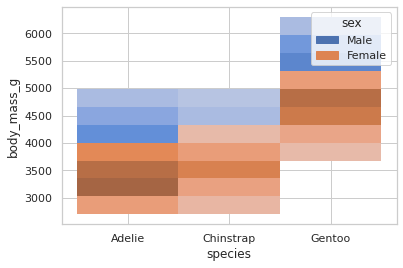

In [29]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.histplot(
    data=penguins, x="species", y="body_mass_g", hue="sex", element='bars', stat='o'
)


penguins

In [9]:
X = df_meta['stool_consistency'].value_counts()
X

formed         74
liquid         45
semi-formed    42
Name: stool_consistency, dtype: int64

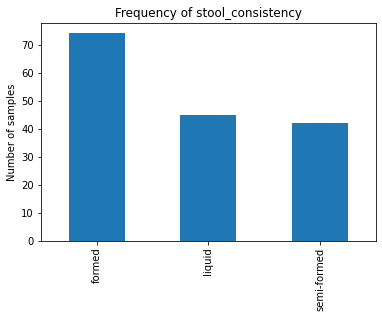

In [11]:
df_meta['stool_consistency'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of stool_consistency')
plt.show()

b) hct source(There are 4 missing data in this column):

In [16]:
X = df_meta.groupby(['disease', 'alleged_abduction']).size()
X

disease                    alleged_abduction
Hodgkin's Disease          0                    11
                           1                     1
Leukemia                   0                    60
                           1                    19
Myelodysplastic Syndromes  0                     5
                           1                     1
Non-Hodgkin's Lymphoma     0                    55
                           1                     5
dtype: int64

In [25]:
for column_name in df_meta:
    if column_name != 'sampleid':
        print(column_name)
        print(df_meta[column_name].value_counts())

stool_consistency
formed         74
liquid         45
semi-formed    42
Name: stool_consistency, dtype: int64
hct_source
PBSC_unmodified    88
cord               69
Name: hct_source, dtype: int64
disease
Leukemia                     79
Non-Hodgkin's Lymphoma       60
Hodgkin's Disease            12
Myelodysplastic Syndromes     6
Name: disease, dtype: int64
categorical_time_relative_to_engraftment
pre     70
post    60
peri    27
Name: categorical_time_relative_to_engraftment, dtype: int64
week_relative_to_hct
-1.0    71
 1.0    40
 0.0    28
 2.0     9
-2.0     9
Name: week_relative_to_hct, dtype: int64
timepoint_of_transplant
6.0      51
5.0      36
3.0      13
7.0      12
9.0       9
2.0       7
1.0       7
0.0       5
4.0       5
52.0      3
363.0     3
379.0     2
14.0      2
24.0      2
Name: timepoint_of_transplant, dtype: int64
day_relative_to_nearest_hct
-2.0     15
-5.0     14
-6.0     12
-3.0     11
 12.0    11
 0.0     10
 13.0    10
 11.0     8
 5.0      6
 7.0      6
 15.